In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io as sio

In [4]:
# Load data
dataset = sio.loadmat('MNIST_database.mat')
print(dataset.keys())
train_classlabel = dataset['train_classlabel']
train_data = dataset['train_data']
test_classlabel = dataset['test_classlabel']
test_data = dataset['test_data']

trainIdx = np.where((train_classlabel == 0) | (train_classlabel == 1 ) | (train_classlabel == 2) | (train_classlabel == 3) | (train_classlabel == 5) | (train_classlabel == 6) | (train_classlabel == 7) | (train_classlabel == 8))[1]
testIdx = np.where((test_classlabel == 0) |(test_classlabel == 1) | (test_classlabel == 2)| (test_classlabel == 3)| (test_classlabel == 5)| (test_classlabel == 6)| (test_classlabel == 7)| (test_classlabel == 8))[1]

trainX = train_data[:, trainIdx]
testX = test_data[:, testIdx]

TrLabel = train_classlabel[:, trainIdx]
TeLabel = test_classlabel[:, testIdx]
# print(trainX.shape)

dict_keys(['__header__', '__version__', '__globals__', 'train_data', 'train_classlabel', 'test_data', 'test_classlabel'])


In [5]:
# Parameters settings
w = np.random.uniform(0, 1, size=(28*28, 10, 10))
# w= np.ones((28*28, 10,10))
# initial width 
sig0 = np.sqrt(10**2 + 10**2)/2
sigma = sig0
iteration = 10000
tau1 = iteration/np.log(sig0)
tau2 = iteration
lr0 = 1
lr = lr0
# print(w.shape)

In [6]:
# SOM
# range(iteration)
for i in range(iteration):
    # sampling
    idx = np.random.randint(0, trainX.shape[1])
#     idx = i
    # Competition
    dist = np.zeros((10,10))
    for r in range(10):
        for c in range(10):
            dist[r,c] = np.dot((trainX[:, idx] - w[:, r, c]), (trainX[:, idx] - w[:, r, c]))
#     print(dist)
    min_r_idx, min_c_idx = np.where(dist == np.amin(dist))
#     print(np.where(dist == np.amin(dist)))
#     if len(min_r_idx) > 1:
    min_r_idx = int(min_r_idx[0])
    min_c_idx = int(min_c_idx[0])
#     print('sss', min_r_idx, min_c_idx)
    # Adaption
    for r in range(10):
        for c in range(10):
            dist = (r - min_r_idx)**2 + (c - min_c_idx)**2
#             print(dist.shape)
            h = np.exp(-dist/(2*sigma**2))
            w[:, r, c]= w[:, r, c] + lr*h*(trainX[:, idx] - w[:, r, c])
    if i ==0:
        continue
    lr = lr0*np.exp(-i/tau2)
    sigma = sig0*np.exp(-i/tau1)
# print(w)

In [7]:
# determine label
label = np.zeros((10,10))
label_dist = np.zeros((TrLabel.shape[1]))
# label_dist = []
for r in range(10):
    for c in range(10):
        for k in range((TrLabel.shape[1])):
            label_dist[k] = np.dot((trainX[:, k] - w[:, r, c]), (trainX[:, k] - w[:, r, c]))
#         print(label_dist)
        min_idx = np.argmin(label_dist)
        label[r, c] = TrLabel[:, min_idx]
print(label)

[[0. 3. 0. 0. 0. 0. 3. 3. 3. 5.]
 [7. 7. 0. 0. 0. 0. 3. 3. 3. 5.]
 [7. 7. 7. 0. 0. 0. 5. 3. 3. 3.]
 [7. 7. 7. 6. 0. 8. 3. 3. 8. 8.]
 [7. 7. 7. 6. 6. 8. 8. 3. 8. 8.]
 [7. 7. 7. 6. 8. 2. 8. 8. 8. 8.]
 [7. 7. 5. 5. 8. 2. 2. 2. 2. 6.]
 [1. 5. 5. 5. 2. 2. 2. 2. 2. 6.]
 [1. 1. 1. 1. 1. 7. 2. 2. 6. 6.]
 [1. 1. 1. 1. 1. 7. 2. 6. 6. 6.]]


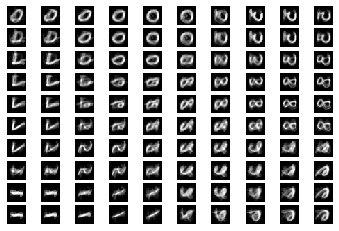

In [12]:
i = 1
for r in range(10):
    for c in range(10):
        img = np.reshape(w[:, r,c], (28, 28))
        plt.subplot(10, 10, i)
        plt.axis('off')
        i += 1
        plt.imshow(img, cmap = 'gray')
plt.savefig('3_figures/'+'3c_' + str(iteration)+'.png', dpi = 500)
plt.show()

c-2: test set

In [13]:
test_label =np.zeros((TeLabel.shape[1]))
test_label_dist =  np.zeros((10,10))
for k in range((TeLabel.shape[1])):
    for r in range(10):
        for c in range(10):
            test_label_dist[r, c] = np.dot((testX[:, k] - w[:, r, c]), (testX[:, k] - w[:, r, c]))
#     print(test_label_dist)
#     print(np.where(test_label_dist == np.amin(test_label_dist)))
    min_r_idx, min_c_idx = np.where(test_label_dist == np.amin(test_label_dist))
#     print(min_r_idx, min_c_idx)
#     if len(min_r_idx) > 1:
    min_r_idx = min_r_idx[0]
    min_c_idx = min_c_idx[0]
    test_label[k] = label[min_r_idx, min_c_idx]
    
# print(test_label)
test_acc = np.sum(test_label == TeLabel)/TeLabel.shape[1]
print(test_acc)

0.7623762376237624


In [14]:
train_label =np.zeros((TrLabel.shape[1]))
train_label_dist =  np.zeros((10,10))
for k in range((TrLabel.shape[1])):
    for r in range(10):
        for c in range(10):
            train_label_dist[r, c] = np.dot((trainX[:, k] - w[:, r, c]), (trainX[:, k] - w[:, r, c]))
#     print(test_label_dist)
#     print(np.where(test_label_dist == np.amin(test_label_dist)))
    min_r_idx, min_c_idx = np.where(train_label_dist == np.amin(train_label_dist))
#     print(min_r_idx, min_c_idx)
#     if len(min_r_idx) > 1:
    min_r_idx = min_r_idx[0]
    min_c_idx = min_c_idx[0]
    train_label[k] = label[min_r_idx, min_c_idx]
    
# print(train_label)
train_acc = np.sum(train_label == TrLabel)/TrLabel.shape[1]
print(train_acc)

0.7726708074534161
